In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [41]:
import warnings
warnings.filterwarnings('ignore')

### preprocessing

In [42]:
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [43]:
data.shape

(374, 13)

In [44]:
data.head

<bound method NDFrame.head of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   O

In [45]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [46]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [47]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [48]:
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [49]:
data['Sleep Disorder']=data['Sleep Disorder'].fillna('NO Disorder')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NO Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [50]:
data=data.drop(['Person ID','Sleep Duration'],axis=1)
data

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,NO Disorder
1,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,NO Disorder
2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,NO Disorder
3,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# EDA

#### Gender

In [51]:
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

<Axes: ylabel='count'>

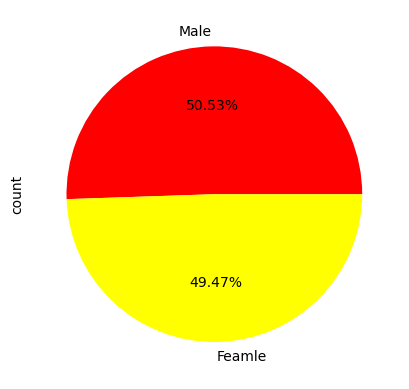

In [52]:
x=['Male','Feamle']
data['Gender'].value_counts().plot.pie(autopct='%.2f%%',labels=x,colors=['red','yellow'])

#### Occupation

In [53]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Text(0, 0.5, 'Number')

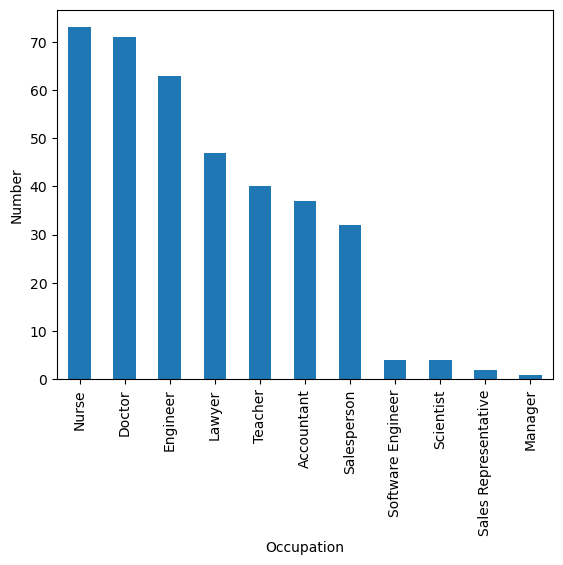

In [54]:
data['Occupation'].value_counts().plot.bar()
plt.ylabel('Number')

#### BMI Category	

In [55]:
data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

<Axes: ylabel='count'>

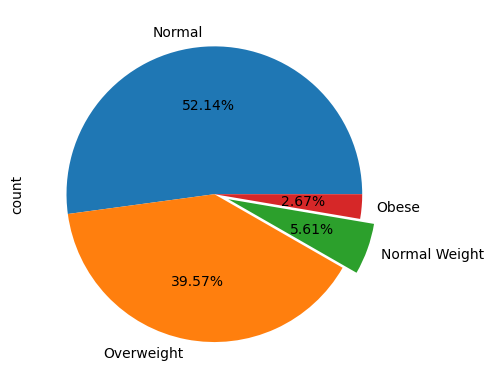

In [56]:
x=['Normal','Overweight','Normal Weight','Obese']
data['BMI Category'].value_counts().plot.pie(autopct='%.2f%%',labels=x,explode=[0,0,0.1,0])

#### histogram

Text(0.5, 0, 'Category')

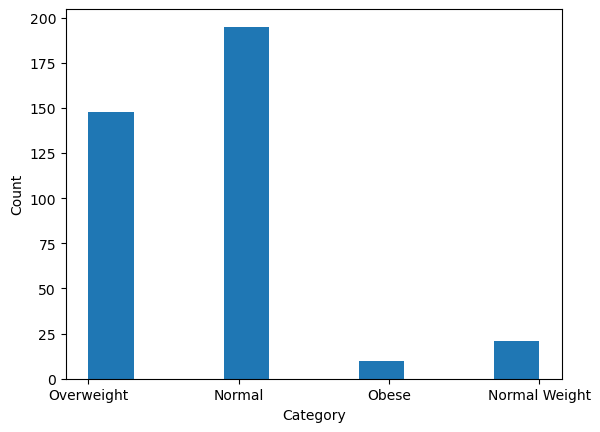

In [57]:
data['BMI Category'].hist()
plt.grid()
plt.ylabel('Count')
plt.xlabel('Category')

#### Barplot

<Axes: xlabel='Stress Level', ylabel='Blood Pressure'>

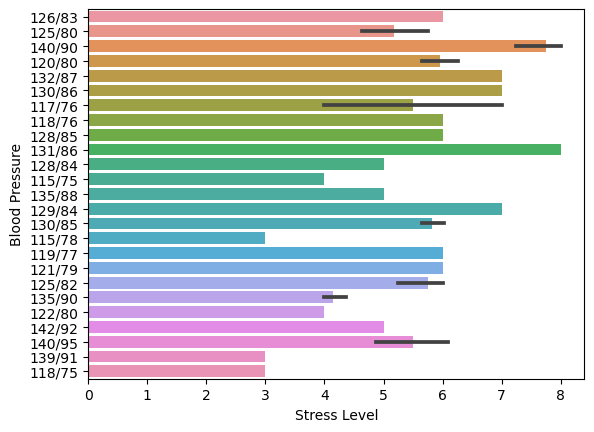

In [58]:
sns.barplot(y=data['Blood Pressure'],x=data['Stress Level'])

<Axes: xlabel='Quality of Sleep', ylabel='Heart Rate'>

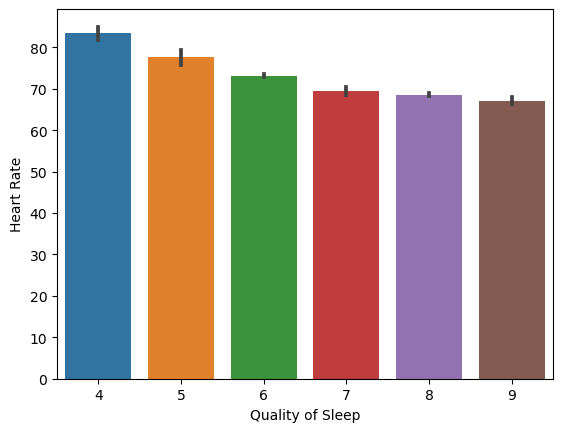

In [59]:
sns.barplot(x=data['Quality of Sleep'],y=data['Heart Rate'])

# Data Traning

In [60]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['BMI Category']=le.fit_transform(data['BMI Category'])
data['Daily Steps']=le.fit_transform(data['Daily Steps'])
data['Sleep Disorder']=le.fit_transform(data['Sleep Disorder'])
data['Blood Pressure']=le.fit_transform(data['Blood Pressure'])
data

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6,42,6,3,11,77,6,1
1,1,28,1,6,60,8,0,9,75,19,1
2,1,28,1,6,60,8,0,9,75,19,1
3,1,28,6,4,30,8,2,22,85,0,2
4,1,28,6,4,30,8,2,22,85,0,2
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,75,3,3,23,68,15,2
370,0,59,5,9,75,3,3,23,68,15,2
371,0,59,5,9,75,3,3,23,68,15,2
372,0,59,5,9,75,3,3,23,68,15,2


In [61]:
x=data.drop('Sleep Disorder',axis=1)
y=data['Sleep Disorder']

In [62]:
x

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6,42,6,3,11,77,6
1,1,28,1,6,60,8,0,9,75,19
2,1,28,1,6,60,8,0,9,75,19
3,1,28,6,4,30,8,2,22,85,0
4,1,28,6,4,30,8,2,22,85,0
...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,75,3,3,23,68,15
370,0,59,5,9,75,3,3,23,68,15
371,0,59,5,9,75,3,3,23,68,15
372,0,59,5,9,75,3,3,23,68,15


In [63]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [65]:
Log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=8)
Tree_score=cross_val_score(DecisionTreeClassifier(max_depth=4),X=x,y=y,cv=8)
Random_score=cross_val_score(RandomForestClassifier(n_estimators=30,random_state=50),X=x,y=y,cv=8)
Svm_score=cross_val_score(SVC(),X=x,y=y,cv=8)
Gua_score=cross_val_score(GaussianNB(),X=x,y=y,cv=8)
kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=90),X=x,y=y,cv=8)
Ad_score=cross_val_score(AdaBoostClassifier(),X=x,y=y,cv=8)
Gra_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y,cv=8)

In [66]:
print(Log_score)
print(Tree_score)
print(Random_score)
print(Svm_score)
print(Gra_score)
print(kn_score)
print(Ad_score)
print(Gra_score)

[0.72340426 0.85106383 0.87234043 1.         1.         1.
 0.82608696 0.73913043]
[0.70212766 0.82978723 0.91489362 1.         1.         0.42553191
 0.86956522 0.89130435]
[0.70212766 0.85106383 0.61702128 1.         0.80851064 0.53191489
 0.86956522 0.89130435]
[0.70212766 0.82978723 0.95744681 1.         1.         1.
 0.84782609 0.86956522]
[0.74468085 0.85106383 0.57446809 1.         1.         0.53191489
 0.86956522 0.76086957]
[0.70212766 0.82978723 0.87234043 0.9787234  0.9787234  1.
 0.73913043 0.36956522]
[0.76595745 0.80851064 0.85106383 0.91489362 1.         0.4893617
 0.65217391 0.82608696]
[0.74468085 0.85106383 0.57446809 1.         1.         0.53191489
 0.86956522 0.76086957]


In [67]:
print(np.mean(Log_score))
print(np.mean(Tree_score))
print(np.mean(Random_score))
print(np.mean(Svm_score))
print(np.mean(Gra_score))
print(np.mean(kn_score))
print(np.mean(Ad_score))
print(np.mean(Gra_score))


0.8765032377428307
0.8291512488436632
0.7839384828862165
0.9008441258094357
0.7915703052728955
0.8087997224791859
0.7885060129509712
0.7915703052728955


In [68]:
model=SVC()

In [69]:
gscv=GridSearchCV(model,{'C':[5,10,15,20,25,30]})
gscv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [5, 10, 15, 20, 25, 30]})

In [70]:
gs_df=gscv.cv_results_

In [71]:
df=pd.DataFrame(gs_df)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006647,0.003538,0.001238,0.001542,5,{'C': 5},0.9,0.916667,0.900000,0.850000,0.796610,0.872655,0.044110,6
1,0.004706,0.002411,0.001300,0.001680,10,{'C': 10},0.9,0.900000,0.900000,0.850000,0.813559,0.872712,0.035352,5
2,0.004385,0.001982,0.002294,0.001241,15,{'C': 15},0.9,0.900000,0.900000,0.850000,0.830508,0.876102,0.029911,3
3,0.002542,0.003157,0.002921,0.002883,20,{'C': 20},0.9,0.900000,0.900000,0.850000,0.830508,0.876102,0.029911,3
4,0.002845,0.002380,0.003681,0.003567,25,{'C': 25},0.9,0.900000,0.916667,0.883333,0.830508,0.886102,0.029728,1
5,0.004204,0.003729,0.001029,0.001014,30,{'C': 30},0.9,0.900000,0.916667,0.883333,0.830508,0.886102,0.029728,1


In [72]:
gscv.best_score_

0.8861016949152543

In [73]:
y_pred=gscv.predict(x_test)
y_pred

array([1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 0])

In [74]:
df=pd.DataFrame({'True value':y_test,'Predicted':y_pred})
df

,True value,Predicted
181,1,1
90,1,1
287,2,2
117,1,1
110,1,1
...,...,...
364,2,2
238,0,0
350,2,2
195,0,0


In [75]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  2,  0],
       [ 0, 47,  1],
       [ 0,  2,  9]], dtype=int64)

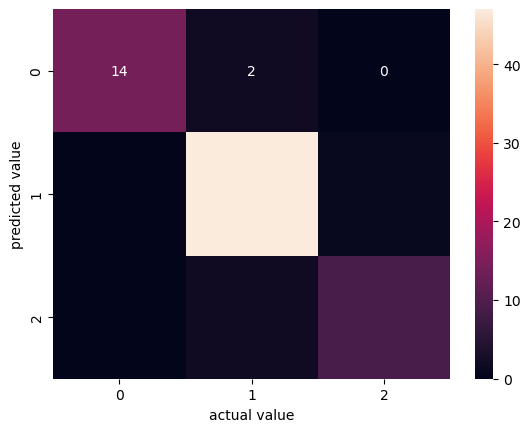

In [76]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.92      0.98      0.95        48
           2       0.90      0.82      0.86        11

    accuracy                           0.93        75
   macro avg       0.94      0.89      0.91        75
weighted avg       0.94      0.93      0.93        75



## Conclusion

### Sleep Disorder


In [79]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

<Axes: ylabel='count'>

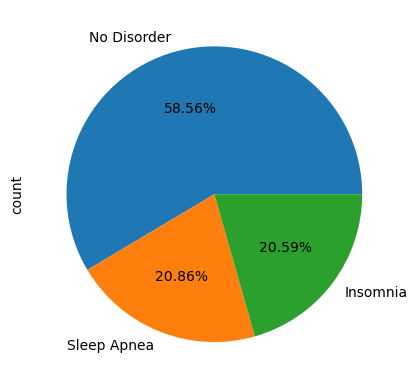

In [80]:
x=['No Disorder','Sleep Apnea','Insomnia']
data['Sleep Disorder'].value_counts().plot.pie(autopct='%.2f%%',labels=x)